In [2]:
import random
import pandas as pd

from uniprot_groups import get_basic_uniprot_groups__df

chains = get_basic_uniprot_groups__df()
groups = chains.groupby('uniprotkb_id').size()


In [3]:
def get_uniprot_testing_uniprot_groups(chains, n):
    random.seed(42)
    sampled_groups = random.sample(list(chains['uniprotkb_id'].unique()), n)
    sampled_chains = chains[chains.uniprotkb_id.isin(sampled_groups)]
    print('total structs', sampled_chains['pdb_code'].nunique())
    print('total chains', len(sampled_chains))
    print(sampled_chains.describe(include='all'))
    print(sampled_chains.columns)
    return sampled_chains

In [13]:
sampled_chains = get_uniprot_testing_uniprot_groups(chains, 10000)

total structs 47340
total chains 132756
       uniprotkb_id pdb_code chain_id  uniprot_group_size
count        132756   132756   132746       132756.000000
unique        10000    47340     2456                 NaN
top          Q79791     3j3q        A                 NaN
freq           2582     1356    38179                 NaN
mean            NaN      NaN      NaN          207.225105
std             NaN      NaN      NaN          440.142110
min             NaN      NaN      NaN            2.000000
25%             NaN      NaN      NaN           11.000000
50%             NaN      NaN      NaN           42.000000
75%             NaN      NaN      NaN          188.000000
max             NaN      NaN      NaN         2582.000000
Index(['uniprotkb_id', 'pdb_code', 'chain_id', 'uniprot_group_size'], dtype='object')


In [14]:
# NaN chain_ids have some large new structures (two letters/chain, but that's already in the dataset too?)
print(sampled_chains[pd.isna(sampled_chains.chain_id)])
sampled_chains = sampled_chains.dropna()

       uniprotkb_id pdb_code chain_id  uniprot_group_size
764465       P12493     6x63      NaN                 554
73633        P62666     6bok      NaN                  41
99228        B2J6D9     6zvt      NaN                 610
99412        B2J6D9     6zw5      NaN                 610
212623       B2J6D9     6zw7      NaN                 610
323482       B2J6D9     6zvr      NaN                 610
324294       B2J6D9     6zw6      NaN                 610
546806       B2J6D9     6zvs      NaN                 610
546992       B2J6D9     6zw4      NaN                 610
106040       P07123     7eyd      NaN                   8


In [15]:

# primary vs secondary accession? (When UNP split?) I should have that chain in all groups.
uniprot_counts_for_one_chain = sampled_chains.groupby(['pdb_code', 'chain_id']).size()
print(uniprot_counts_for_one_chain[uniprot_counts_for_one_chain > 1])

pdb_code  chain_id
1m7t      A           2
1mow      A           2
          D           2
          G           2
          J           2
                     ..
7cyy      F           2
7mvs      A           2
          B           2
7rxc      B           2
7rxd      B           2
Length: 195, dtype: int64


Looks like mostly chimeras/hybrid?

Is there primary vs secondary? Probably not. No idea, how many, but that has a good reason.
When merged, the original is primary (how often?) And is this csv a list of strictly primaries?
When demerged, new is primary, that's good (probably had good reason to demerge/split).
We wouldn't compare structures across organisms, as they have different UNP accessions (reference?) (how probable is that they also have different sequence?)


## Uniprot Group sizes

In [16]:
print(chains.describe(include='all'))
groups.describe()
# todo v chain_id je nekdy NONE?

       uniprotkb_id pdb_code chain_id  uniprot_group_size
count        570213   570213   570167       570213.000000
unique        43626   165461     3170                 NaN
top          Q79791     3j3q        A                 NaN
freq           2582     1356   158504                 NaN
mean            NaN      NaN      NaN          155.075631
std             NaN      NaN      NaN          299.413252
min             NaN      NaN      NaN            2.000000
25%             NaN      NaN      NaN           11.000000
50%             NaN      NaN      NaN           36.000000
75%             NaN      NaN      NaN          158.000000
max             NaN      NaN      NaN         2582.000000


count    43626.000000
mean        13.070485
std         43.082697
min          2.000000
25%          2.000000
50%          4.000000
75%         10.000000
max       2582.000000
dtype: float64

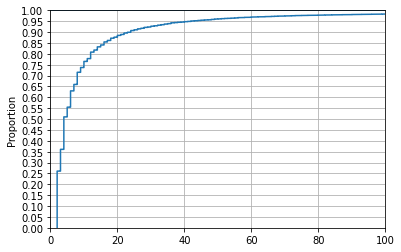

In [31]:
from matplotlib import pyplot as plt, ticker
import numpy as np
import seaborn as sns

ax = sns.ecdfplot(groups)
ax.set(xlim=(0, 100))
plt.axhline(np.max(ax.lines[0].get_ydata()))
plt.grid()
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
# ax.yaxis.set_major_formatter(ticker.PercentFormatter())

95% of groups are of size <=40

In [32]:
# todo same cdf of chains

uniprotkb_id
A0A024B7W1    166
A0A059T4A1    110
A0A068EP60    270
A0A0A7HR51    138
A0A0H2ZD27    128
             ... 
Q9Y3Z3        276
Q9Y9L0        200
Q9Z9H5        387
R4NN21        130
X5MEI1        112
Length: 738, dtype: int64